In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
sns.set(font_scale=1.6)
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

In [3]:
# options
paper_pal = {
    "Daheim":"#ff80ff",
    "Grenzboten":"#ff9933",
    "Gartenlaube":"#85e085",
}

op_pal = {
    "progressiv":"#ff6666",
    "neutral/ambivalent":"#b3b3b3",
    "konservativ":"#668cff",
         }

paper_order = ["Grenzboten","Gartenlaube","Daheim"]
op_order = ["konservativ","neutral/ambivalent","progressiv"]
yearsystem = "Quinquennium" # ["Year","Decade","Quinquennium"]

## load data

In [4]:
gender = pd.read_csv("output_data/plotdata_token.tsv", sep="\t")
gender["Zeitschrift"] = gender.Zeitschrift.apply(lambda x:"".join([list(x)[0].upper()]+list(x)[1:]))

/tmp/ipykernel_1788428/1884186077.py:1: DtypeWarning: Columns (8,9,10,11,13,14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  gender = pd.read_csv("output_data/plotdata_token.tsv", sep="\t")


In [7]:
op = pd.read_csv("output_data/flash_gender_op_ref2.tsv",sep="\t")
l = list(op.fname)
r = []
for fname in gender["fname"]:

    if fname in l:
        r.append(list(op[op.fname == fname].Haltung)[0])
    else:
        r.append("none")

In [9]:
gender["Haltung"] = list(r)

# Artikel pro Zeitschrift (Abb.3)

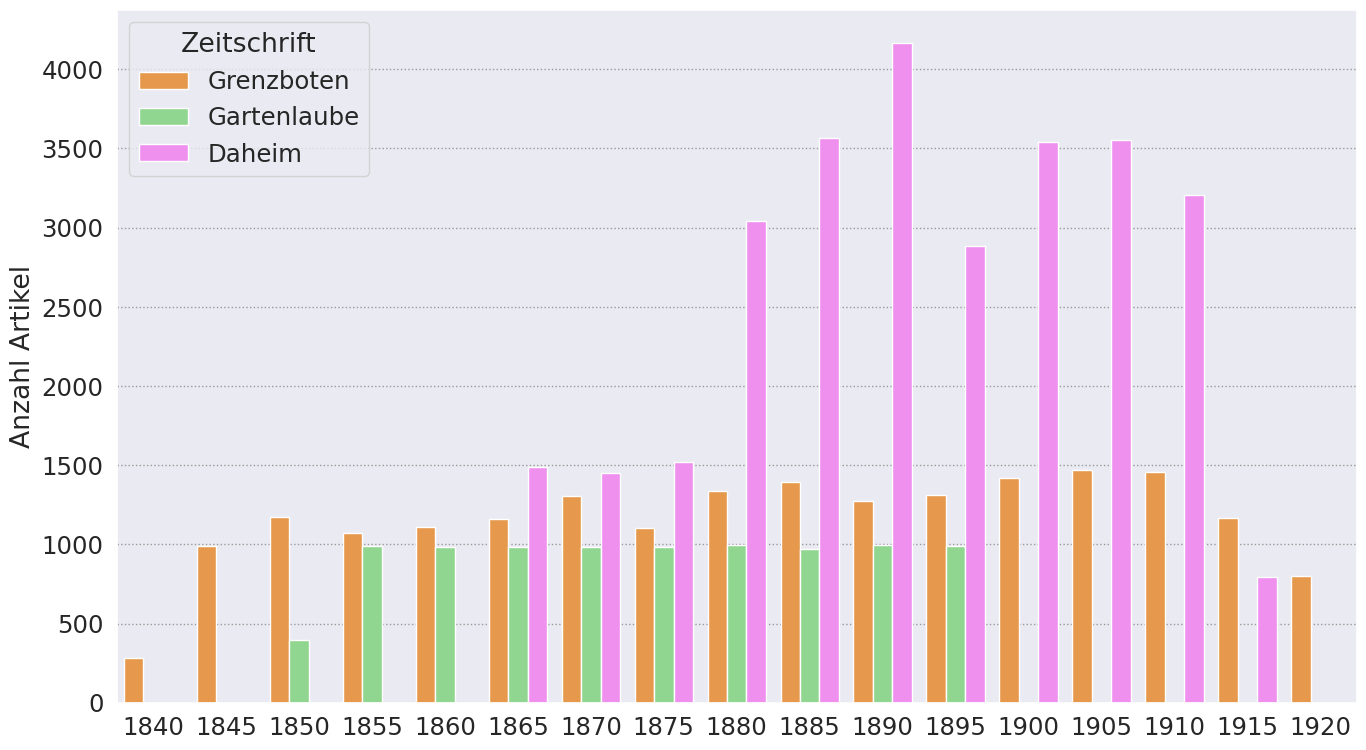

In [20]:
record = []
for year in set(gender[yearsystem]):
    for source in set(gender.Zeitschrift):
        
        
        share = len(gender[(gender[yearsystem] == year) & (gender.Zeitschrift == source)])
  
        record.append([year,source, share])
        
record = pd.DataFrame(record)
record.columns = ["Year","Zeitschrift","Artikel"]

fig, ax = plt.subplots(figsize=(16,9))

sns.barplot(data=record, x="Year", y="Artikel", hue="Zeitschrift", hue_order=paper_order, palette=paper_pal)

if yearsystem == "Year":
    plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("Anzahl Artikel")
plt.show()

## Anteil Belletristik (Abb. 2)

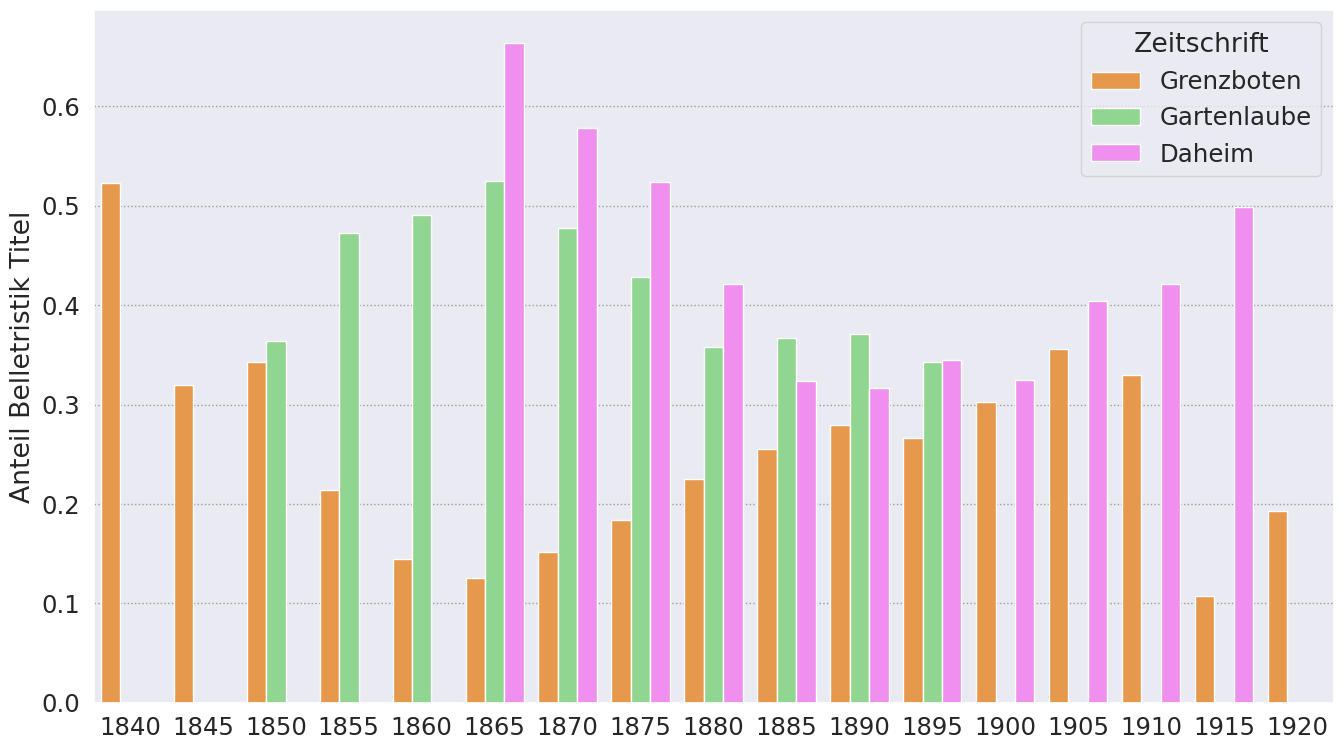

In [10]:
pdat = gender
record = []
for year in set(pdat[yearsystem]):
    for source in set(pdat.Zeitschrift):
        
        try:
            share = len(pdat[(pdat[yearsystem] == year) & (pdat.Belletristik == "JA") & (pdat.Zeitschrift == source)])/len(pdat[(pdat[yearsystem] == year) & (pdat.Zeitschrift == source)])
        except ZeroDivisionError:
            share = 0

        record.append([year,source, share])
record = pd.DataFrame(record)
record.columns = ["Year","Zeitschrift","Anteil Belletristik Titel"]

fig, ax = plt.subplots(figsize=(16,9))

sns.barplot(data=record, x="Year", y="Anteil Belletristik Titel", hue="Zeitschrift", hue_order=paper_order, palette=paper_pal)

if yearsystem == "Year":
    plt.xticks(rotation=90)

plt.xlabel("")
plt.show()

## Anteil Belletristik Token (Abb.3)

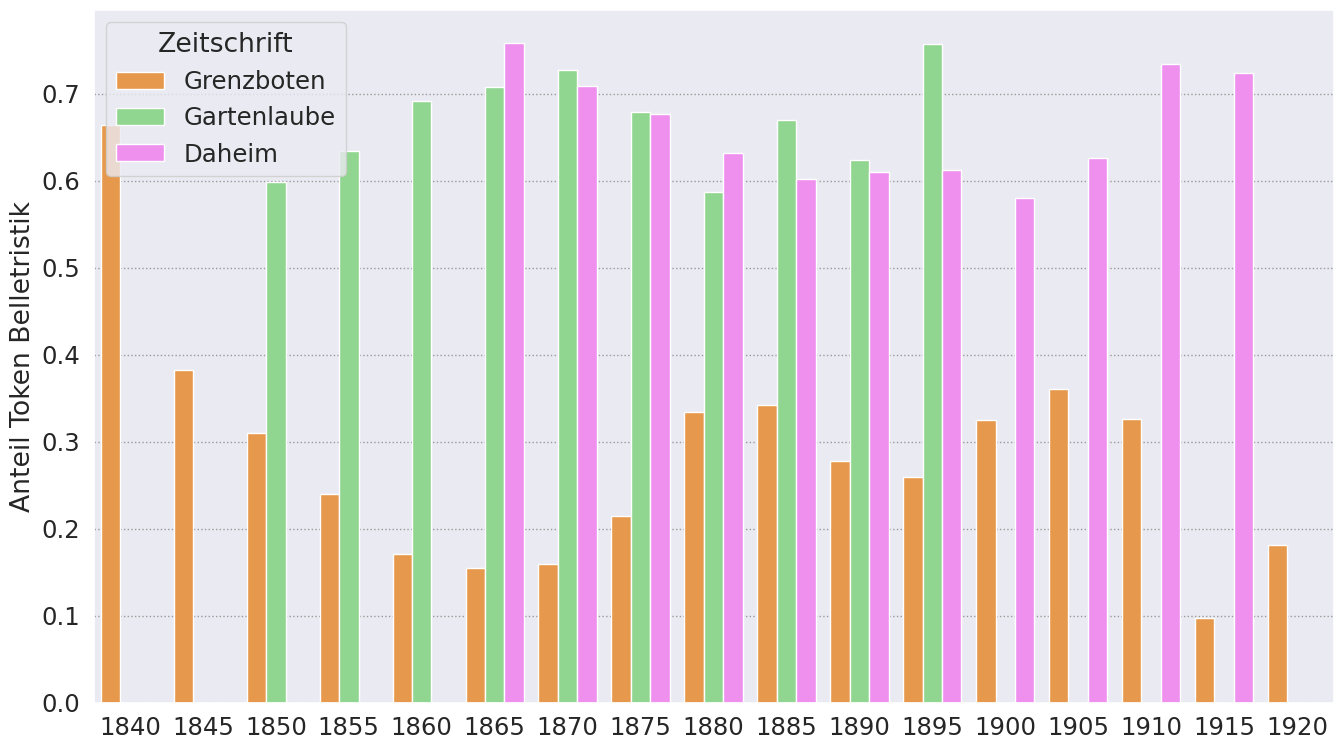

In [9]:
pdat = gender
record = []
for year in set(pdat[yearsystem]):
    for source in set(pdat.Zeitschrift):
        
        try:
            share = sum(pdat[(pdat[yearsystem] == year) & (pdat.Belletristik == "JA") & (pdat.Zeitschrift == source)].tokencount)/sum(pdat[(pdat[yearsystem] == year) & (pdat.Zeitschrift == source)].tokencount)
        except ZeroDivisionError:
            share = 0

        record.append([year,source, share])
record = pd.DataFrame(record)
record.columns = ["Year","Zeitschrift","Anteil Token Belletristik"]

fig, ax = plt.subplots(figsize=(16,9))

sns.barplot(data=record, x="Year", y="Anteil Token Belletristik", hue="Zeitschrift", hue_order=paper_order, palette=paper_pal)

if yearsystem == "Year":
    plt.xticks(rotation=90)

plt.xlabel("")
plt.show()

## Anteil Gender in nicht-Belletrsitik (Abb.4)

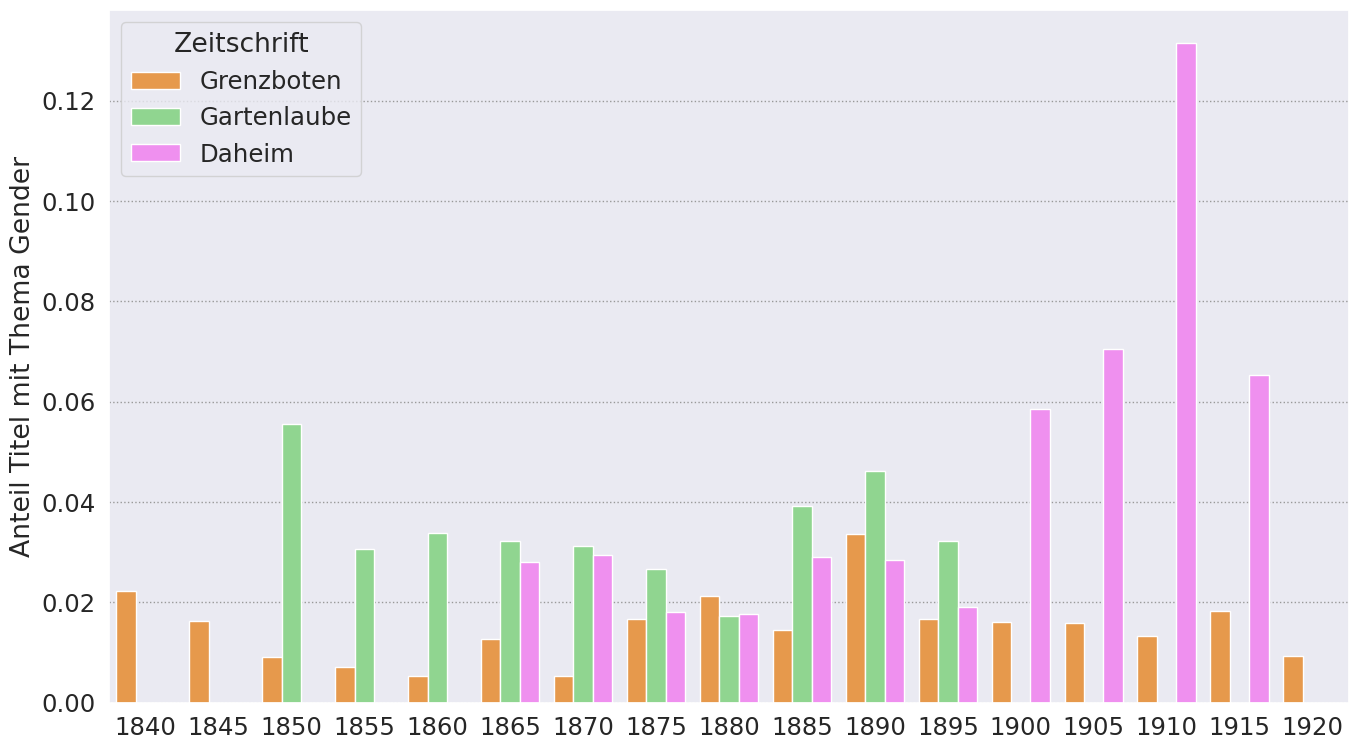

In [87]:
pdat = gender[gender.Belletristik == "NEIN"]
record = []
for year in set(pdat[yearsystem]):
    for source in set(pdat.Zeitschrift):
        
        try:
            share = len(pdat[(pdat[yearsystem] == year) & (pdat.Thema == "Gender") & (pdat.Zeitschrift == source)])/len(pdat[(pdat[yearsystem] == year) & (pdat.Zeitschrift == source)])
        except ZeroDivisionError:
            share = 0

        record.append([year,source, share])
record = pd.DataFrame(record)
record.columns = ["Year","Zeitschrift","Anteil Titel mit Thema Gender"]

fig, ax = plt.subplots(figsize=(16,9))

sns.barplot(data=record, x="Year", y="Anteil Titel mit Thema Gender", hue="Zeitschrift", hue_order=paper_order, palette=paper_pal)

if yearsystem == "Year":
    plt.xticks(rotation=90)

plt.xlabel("")
plt.show()

## Haltung zum Themenkomplex Gender nach Zeitschriften (Abb. 5)

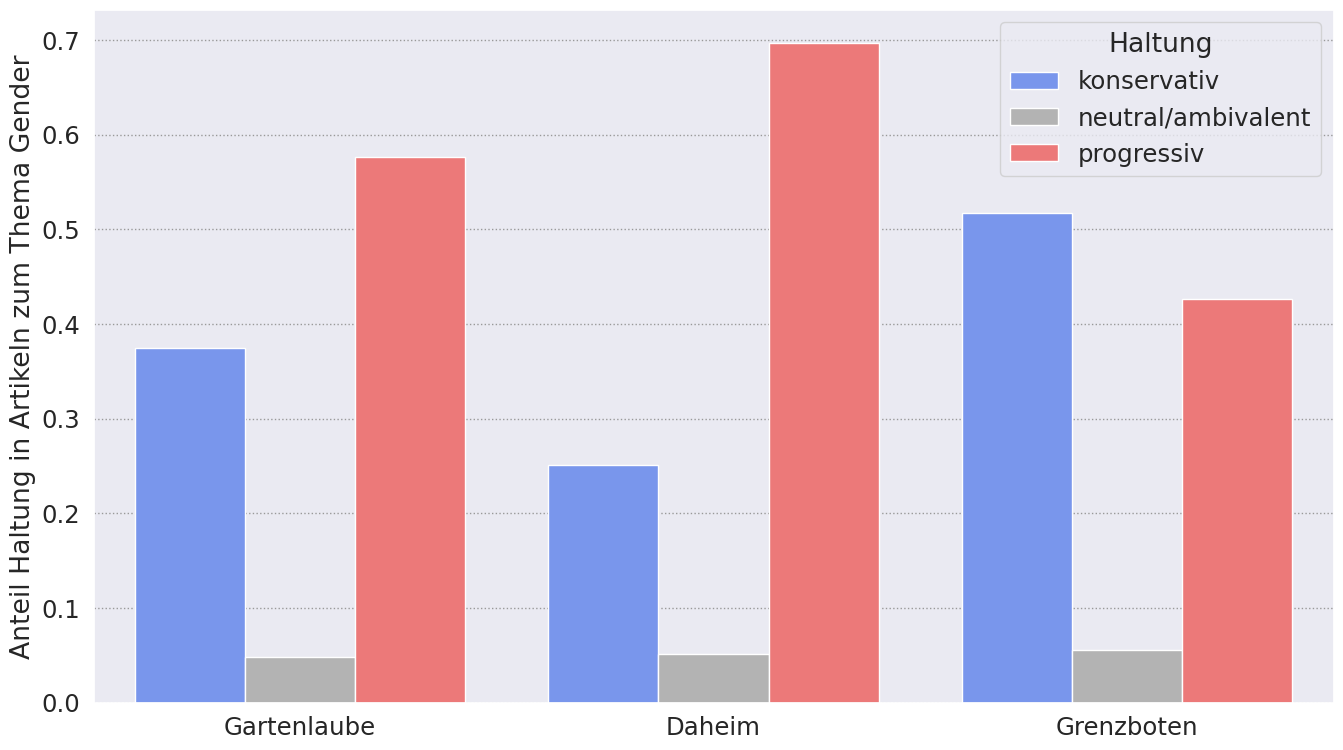

In [19]:
pdat = gender[gender.Haltung.isin(["progressiv","neutral/ambivalent","konservativ"])]

record = []

for source in set(pdat.Zeitschrift):
    for haltung in ["progressiv","neutral/ambivalent","konservativ"]:
      
        share = len(pdat[(pdat.Haltung == haltung) & (pdat.Zeitschrift == source)])/len(pdat[pdat.Zeitschrift == source])+0.0000001
    

        record.append([haltung, source, share])
record = pd.DataFrame(record)
record.columns = ["Haltung","Zeitschrift","Anteil Haltung in Artikeln zum Thema Gender"]

fig, ax = plt.subplots(figsize=(16,9))

sns.barplot(data=record, x="Zeitschrift", y="Anteil Haltung in Artikeln zum Thema Gender", hue="Haltung", hue_order=op_order, palette=op_pal)

if yearsystem == "Year":
    plt.xticks(rotation=90)

plt.xlabel("")
plt.show()

# Entwicklung der Haltung zum Themenkomplex Gender nach Zeitschriften (Abb.6)

/tmp/ipykernel_882029/3854463157.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(labels=["" for x in set(pdat[yearsystem])])
/tmp/ipykernel_882029/3854463157.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(labels=["" for x in set(pdat[yearsystem])])


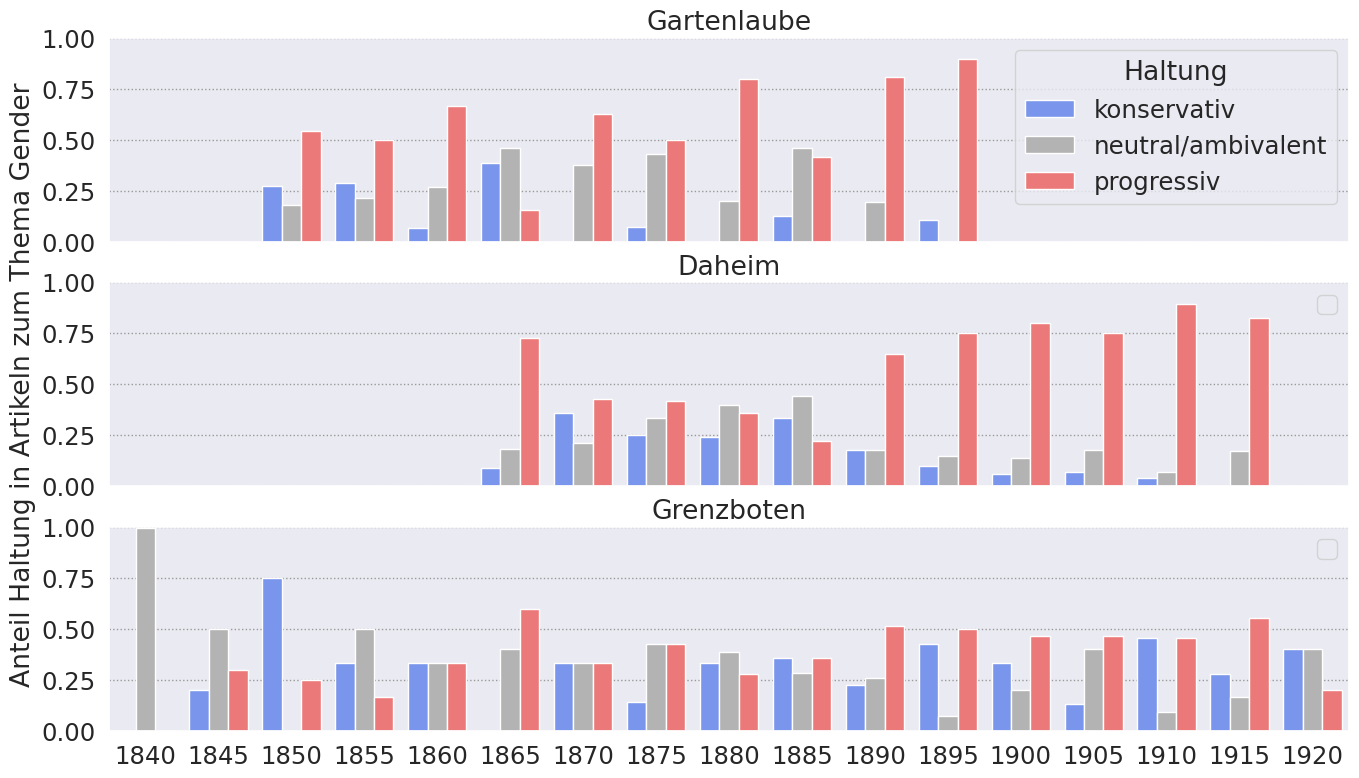

In [72]:
pdat = gender[gender.Haltung.isin(["progressiv","neutral/ambivalent","konservativ"])]
yearsystem = "Quinquennium" #"Quinquennium"

record = []
for year in set(pdat[yearsystem]):
    for source in set(pdat.Zeitschrift):
        for haltung in ["progressiv","neutral/ambivalent","konservativ"]:
      
            share = len(pdat[(pdat[yearsystem] == year) & (pdat.Haltung == haltung) & (pdat.Zeitschrift == source)])/(len((pdat[(pdat[yearsystem] == year) & (pdat.Zeitschrift == source)]))+0.01)
    

            record.append([year, haltung, source, share])
            
record = pd.DataFrame(record)
record.columns = [yearsystem, "Haltung","Zeitschrift","Anteil Haltung in Artikeln zum Thema Gender"]

fig, ax = plt.subplots(3,1, figsize=(16,9))
i = 0
for source in set(pdat.Zeitschrift):
    
    sns.barplot(ax=ax[i], data=record[record.Zeitschrift==source], x=yearsystem, y="Anteil Haltung in Artikeln zum Thema Gender", hue="Haltung", hue_order=op_order, palette=op_pal)
    
    if yearsystem == "Year":
        plt.xticks(rotation=90)
    

    ax[i].set_xlabel("")
    ax[i].set_ylabel("")
    ax[i].set_ylim(0,1)
    ax[i].set_title(source)
    if i != 0:
         ax[i].legend("")
    if i != 2:
         ax[i].set_xticklabels(labels=["" for x in set(pdat[yearsystem])])
    if i == 1:
         ax[i].set_ylabel("Anteil Haltung in Artikeln zum Thema Gender")
    i+=1
    
plt.show()

/tmp/ipykernel_882029/3076704107.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(labels=["" for x in set(pdat[yearsystem])])
/tmp/ipykernel_882029/3076704107.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(labels=["" for x in set(pdat[yearsystem])])


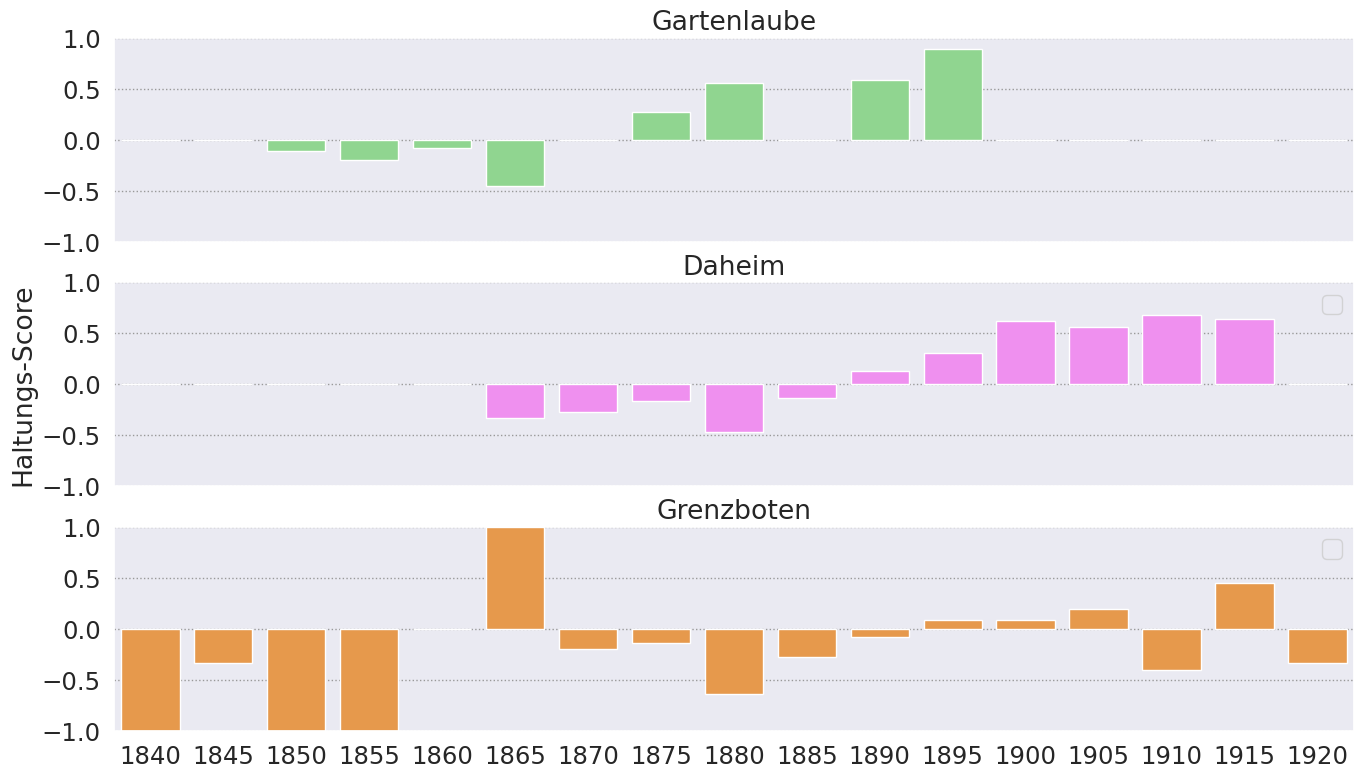

In [86]:
pdat = gender[gender.Haltung.isin(["progressiv","neutral/ambivalent","konservativ"])]
yearsystem = "Quinquennium" #"Quinquennium"

record = []
for year in set(pdat[yearsystem]):
    for source in set(pdat.Zeitschrift):
    
        haltung = "konservativ"
        k = len(pdat[(pdat[yearsystem] == year) & (pdat.Haltung == haltung) & (pdat.Zeitschrift == source)])+0.000001
        haltung = "progressiv"
        p = len(pdat[(pdat[yearsystem] == year) & (pdat.Haltung == haltung) & (pdat.Zeitschrift == source)])+0.000001
        share = p/(k+p) - k/(k+p)

        record.append([year, source, share])
            
record = pd.DataFrame(record)
record.columns = [yearsystem, "Zeitschrift", "Haltung"]


fig, ax = plt.subplots(3,1, figsize=(16,9))
i = 0
for source in set(pdat.Zeitschrift):
    
    sns.barplot(ax=ax[i], data=record[record.Zeitschrift==source], x=yearsystem, y="Haltung", color=paper_pal[source])
    
    if yearsystem == "Year":
        plt.xticks(rotation=90)
    

    ax[i].set_xlabel("")
    ax[i].set_ylabel("")
    ax[i].set_ylim(-1,1)
    ax[i].set_title(source)
    if i != 0:
         ax[i].legend("")
    if i != 2:
         ax[i].set_xticklabels(labels=["" for x in set(pdat[yearsystem])])
    if i == 1:
         ax[i].set_ylabel("Haltungs-Score")
    i+=1
    
plt.show()